# COGS 108 - Final Project 

# Overview

In this project we gathered information regarding song audio attributes using a dataset from the Spotify API. We utilized this dataset to find trends in audio attributes across different music genres and analyze which attributes are significant in defining boundaries between genres. From there we attempted to create a model that can predict a song’s genre based on these significant attributes.

# Names

- Bilal Salinggih
- James Yu
- Jared Suasin
- Dilraj Sandhu
- Franz Quijano

###### Group Members IDs

- A13674432
- A15598575
- A12650991
- A15747688
- A13143611

# Research Question

Is there a correlation between different attributes of a song and it’s music genre? Can we predict trends in attributes (i.e. danceability, energy, etc.) within different music genres?

## Background and Prior Work

Traditionally, music is separated into specific genres. People are familiar with common genres such as country, hip-hop, classical, and beyond, however as music continues to evolve, the lines between genres become more blurred. A recent example of this is Lil Nas X’s song ‘Old Town Road’, a country song with rap elements. ‘Old Town Road’ was removed from Billboard’s ‘Top Country Songs’ chart because Billboard determined that the song itself wasn’t representative enough of Country elements to be included on the ranking. From this instance we can see that it can be difficult to define the boundaries of where one genre ends and another begins.

Previous studies have been conducted to attempt genre prediction from song attributes. One machine learning study from the University of Rome Tor Vergata tried to classify music genres using MIDI files and analyzed the instrumentation composition of songs (https://pdfs.semanticscholar.org/e214/5add1318af0654a4901fe92080bc8168a9f4.pdf). Another independent study by Victor Ramirez utilized K-Means Clustering to categorize music genres. Ramirez separated songs into different 8 K-Means labels (i.e. Fast & Danceable Instrumentals, Slow Dance, Happy & Upbeat Instrumentals, Slow & Somber Acoustics) and analyzed the audio attributes within each label to find trends (https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443).

Using the findings from these studies we believe that the audio attributes significant in predicting a song’s genre are ‘acousticness’, ‘instrumentalness’, ‘danceability’, ‘tempo’, and ‘energy’. We believe ‘acousticness’ and ‘instrumentalness’ can predict a song’s genre as the University of Rome Tor Vergata study was able to classify genres through instrumentation. Similarly, we also believe that ‘danceability’, ‘tempo’, and ‘energy’ can be used to predict a song’s genre as Ramirez was also able to highlight differences across categories based on these audial features.


# Hypothesis


We hypothesize that certain audio attributes will have significant difference across genres such that it is possible to define genre boundaries and predict songs within genres. In particular, we predict that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song’s genre.

We believe our hypothesis is true because every genre has unique audial characteristics. These characteristics define each genre and need to be different enough from one another in order to show significant differences.

# Dataset(s)

Dataset Name: Ultimate Spotify Tracks DB 

Link to the dataset: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db 
Number of observations: 228,159

Since we are attempting to predict attribute trends between genres, we utilized data from a Spotify API dataset. This dataset provides data on over 228,000 songs across 26 genres. It includes song attributes determined by Spotify’s algorithms including tempo, key, danceability, energy and more. We used this dataset to find correlations between music genres and the different attributes associated with the songs within these genres.


# Setup

In [65]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#added imports for linear regression stuff and plotting
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})
# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Data Cleaning

Reading in data from csv.

In [66]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


Checking for any null values in any of the columns

In [67]:
df[df.isnull().any(axis=1)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


There are no null values present in the data set.

In [68]:
del df['duration_ms']
del df['key']
del df['mode']
del df['time_signature']

We believe that these song attributes are unimportant to our analysis due to their lack of proper scale. Despite the importance of key and time signatures to a song, it will not be a good way to define each genre. As compared to the other attributes which are on a large scale, it is harder to determine a song's genre simply based on key, mode, or time signature.

We will not be creating a model to determine genre based on a song's duration as it is not the best indicator of genre. Thus, we will remove it from our data set.

Checking the basic descriptive statistics of the data to look for any unreasonable values

In [69]:
df.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


From this we can determine how variables are measured by Spotify's API.
Popularity is on a scale from 0-100, from least to most popular. This is likely ranked from Spotify's streaming data which counts the number of streams a particular song has.
Acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence are on a scale from 0.0 - 1.0, from lowest to highest.
This is likely determined by Spotify's API from their audio recognition and machine learning models.
Loudness is based on the average decibel level of each song.
Tempo is based on the bpm, or beats per minute of the song.

Additionally, from looking at the basic descriptive statistics, it seems as though there are no clear outliers within the data that we can currently see. We now understand the scale to which each variable is measured.

In [70]:
# groups each song by genre and takes the mean of each attribute, sorting by mean popularity after
grouped = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
grouped

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rap,60.533795,0.168080,0.697244,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Hip-Hop,58.423131,0.176172,0.718808,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Anime,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Blues,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Children’s Music,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237


There are many genres of music as defined by Spotify, 25 existing in this dataset. We believe it to be necessary to narrow down these genres by combining similar ones such as Hip-hop and rap, and dropping others such as Comedy and A Capella. This will make our analysis easier to follow.

Looking at these statistics, it seems as though Anime, Blues, Children's Music, and Alternative all have the same statistics. We have to clean our dataset as the same songs may be mislabeled for these genres.

In [71]:
df[df['genre']=='Anime'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
53485,Anime,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
58740,Anime,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
57302,Anime,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
55208,Anime,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
58978,Anime,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [72]:
df[df['genre']=='Blues'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
81114,Blues,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
24889,Blues,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
23451,Blues,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
9322,Blues,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
25127,Blues,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [73]:
df[df['genre']=="Children’s Music"].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
42642,Children’s Music,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
92362,Children’s Music,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
90924,Children’s Music,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
88830,Children’s Music,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
92600,Children’s Music,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [74]:
df[df['genre']=='Alternative'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
4365,Alternative,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
26771,Alternative,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
21910,Alternative,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
10551,Alternative,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
27009,Alternative,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


From this, we can infer that Spotify's API duplicates songs if they are listed under multiple genres. In this case, all these songs are labeled as Indie, Blues, and Alternative. In order to remedy this problem, we believe it best to simply keep one set of these songs under the Alternative label.

This brings up an issue with other genres where there may be duplicate songs under different genres. However, we believe it is unnecessary to remove these duplicates as it would require manually determining the correct genre to which a song belongs. There is enough differentation within the remaining genres for this not to be a huge problem. In this specific case, it was an issue as the specific set of songs were all labeled under four genres without any differentiation.

In [75]:
index = df[df['genre']=="Anime"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Blues"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Children’s Music"].index
df.drop(index, inplace=True)
df['genre'].value_counts()

Comedy         9681
Soundtrack     9646
Indie          9543
Jazz           9441
Pop            9386
Electronic     9377
Alternative    9353
Folk           9299
Hip-Hop        9295
Rock           9272
Classical      9256
Rap            9232
World          9096
Soul           9089
R&B            8992
Reggaeton      8927
Ska            8874
Reggae         8771
Dance          8701
Country        8664
Opera          8280
Movie          7806
A Capella       119
Name: genre, dtype: int64

Now we have removed the duplicate genres and the songs are being represented by the Alternative genre.

The next step in cleaning the data set is to combine extremely similar genres, such as Rap and Hip-Hop. Rap is an essential element in Hip-Hop and the genres are very much alike, despite Spotify separating the two for an unknown reason.

In [76]:
grouped = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
grouped
# re-initialize grouped since we have just removed some genres

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rap,60.533795,0.168080,0.697244,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Hip-Hop,58.423131,0.176172,0.718808,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Alternative,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
R&B,52.308719,0.288216,0.642125,0.564248,0.025558,0.175350,-7.597064,0.120994,116.373834,0.450346
Folk,49.940209,0.463201,0.527276,0.491733,0.084934,0.170773,-9.870282,0.045077,118.748882,0.440237


In [77]:
rap_mean = grouped.iloc[1] # Mean attributes for rap
hiphop_mean = grouped.iloc[3] # Mean attributes for hip-hop
rap_mean.sub(hiphop_mean)

popularity          2.110665
acousticness       -0.008092
danceability       -0.021564
energy              0.007245
instrumentalness   -0.001883
liveness           -0.002207
loudness            0.190370
speechiness        -0.017210
tempo               0.309770
valence            -0.017462
dtype: float64

By subtracting the means of the two genres, we can see that there are very small differences between the two, the biggest being popularity, loudness, and tempo. Keep in mind that popularity is on a 1-100 scale so a 2.11 difference is not huge. Loudness is based on decibel level of songs and has a standard deviation of 5.94, so a .19 difference is not huge. Tempo has a standard deviation of 30.7 so a .31 difference is not huge as well. From this, we can determine that the two genres are quite similar in attributes and it would help to clean up the dataset by combining the two.

In [78]:
pop_mean = grouped.iloc[0]
country_mean = grouped.iloc[10]
pop_mean.sub(country_mean)

popularity          20.490251
acousticness        -0.045353
danceability         0.063197
energy               0.005890
instrumentalness     0.010990
liveness            -0.007250
loudness             0.846270
speechiness          0.058974
tempo               -2.238575
valence             -0.053789
dtype: float64

An example of the potential difference between genres is with pop and country. There are significant differences between attributes such as acousticness, energy, and instrumentalness, to name a few.

In [79]:
# This will set all of the songs in the Hip-Hop genre to the Rap genre
df.loc[df['genre']=='Hip-Hop', 'genre'] = 'Rap'

We have set all of the songs labeled as Hip-Hop to Rap. However, we now have to deal with the fact that there may be duplicate songs within the genre as many Hip-Hop songs are also labeled as Rap songs.

In [80]:
# Removes duplicate rows with duplicate track ids from rows that are in the rap genre
df[df['genre']=='Rap'] = df[df['genre']=='Rap'].drop_duplicates(subset='track_id',keep='first')

In [81]:
df['genre'].value_counts()

Rap            12417
Comedy          9681
Soundtrack      9646
Indie           9543
Jazz            9441
Pop             9386
Electronic      9377
Alternative     9353
Folk            9299
Rock            9272
Classical       9256
World           9096
Soul            9089
R&B             8992
Reggaeton       8927
Ska             8874
Reggae          8771
Dance           8701
Country         8664
Opera           8280
Movie           7806
A Capella        119
Name: genre, dtype: int64

Previously there were 9295 hip-hop songs and 9232 rap songs, making for a total of 18,527 songs. However, now that we have removed duplicate songs, we now have a total of 12,417 songs.

In [82]:
grouped = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
grouped
# re-initialize grouped since we have just removed some genres

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Rap,59.042361,0.176055,0.702099,0.650563,0.012923,0.198739,-6.748026,0.189406,120.787302,0.470104
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Alternative,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
R&B,52.308719,0.288216,0.642125,0.564248,0.025558,0.175350,-7.597064,0.120994,116.373834,0.450346
Folk,49.940209,0.463201,0.527276,0.491733,0.084934,0.170773,-9.870282,0.045077,118.748882,0.440237
Soul,47.027836,0.360679,0.617645,0.532506,0.062295,0.179252,-8.866409,0.082531,115.322493,0.480562


Now we can explore the data further, first by counting the number of songs

In [83]:
df['genre'].value_counts()

Rap            12417
Comedy          9681
Soundtrack      9646
Indie           9543
Jazz            9441
Pop             9386
Electronic      9377
Alternative     9353
Folk            9299
Rock            9272
Classical       9256
World           9096
Soul            9089
R&B             8992
Reggaeton       8927
Ska             8874
Reggae          8771
Dance           8701
Country         8664
Opera           8280
Movie           7806
A Capella        119
Name: genre, dtype: int64

In [84]:
# number of songs per genre. a-capella has the least # of songs
df['genre'].value_counts()

Rap            12417
Comedy          9681
Soundtrack      9646
Indie           9543
Jazz            9441
Pop             9386
Electronic      9377
Alternative     9353
Folk            9299
Rock            9272
Classical       9256
World           9096
Soul            9089
R&B             8992
Reggaeton       8927
Ska             8874
Reggae          8771
Dance           8701
Country         8664
Opera           8280
Movie           7806
A Capella        119
Name: genre, dtype: int64

In [85]:
# tried to get the most commmon artists per genre, need to fix
test = df.groupby(['genre']).agg(lambda x: x.value_counts().index[0])
test = test['artist_name']
test

genre
A Capella         The Singers Unlimited
Alternative     Five Finger Death Punch
Classical       Wolfgang Amadeus Mozart
Comedy                    George Carlin
Country                   George Strait
Dance                       Chris Brown
Electronic                         Moby
Folk                          Bob Dylan
Indie                            G-Eazy
Jazz                        Miles Davis
Movie                      Randy Newman
Opera                    Giuseppe Verdi
Pop                               Drake
R&B                         Chris Brown
Rap                              Eminem
Reggae         Bob Marley & The Wailers
Reggaeton                  Daddy Yankee
Rock                        The Beatles
Ska                                NOFX
Soul                        John Legend
Soundtrack                  Hans Zimmer
World                  Hillsong Worship
Name: artist_name, dtype: object

Before we begin our analysis, we need to narrow down the genres to analyze. We will be removing Comedy as the tracks seem to be stand-up bits that aren't really songs but are hosted on Spotify. We will be removing A Capella due to its low representation in this dataset with only 119 songs. We feel this is not sufficient to analyze, especially when compared to the other genres which contain on average, 9000 songs.

In [86]:
index = df[df['genre']=="A Capella"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Comedy"].index
df.drop(index, inplace=True)

In [87]:
# average popularity of songs per genre - indicates how popular each genre is
average_popularity = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
average_popularity

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Rap,59.042361,0.176055,0.702099,0.650563,0.012923,0.198739,-6.748026,0.189406,120.787302,0.470104
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Alternative,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
R&B,52.308719,0.288216,0.642125,0.564248,0.025558,0.175350,-7.597064,0.120994,116.373834,0.450346
Folk,49.940209,0.463201,0.527276,0.491733,0.084934,0.170773,-9.870282,0.045077,118.748882,0.440237
Soul,47.027836,0.360679,0.617645,0.532506,0.062295,0.179252,-8.866409,0.082531,115.322493,0.480562


Looking at the mean attributes of each genre after all of our cleaning, there seem to be no outliers or significant cleanings to be made. We were able to combine two extremely similar genres, Rap and Hip-Hop. We were able to resolve an issue with Spotify's genre classification of Alternative songs. We can now begin our analysis.

# Data Analysis & Results

## Exploratory Data Analysis

From our hypothesis we are predicting that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song's genre. Before we scope down and focus on analyzing if these attributes are viable to do so with, we must first do exploratory data analysis.

### Unique Music Genres

In [88]:
genres = df.genre.unique()
#genres = genres.sort()
genres

array(['Opera', 'Alternative', 'Dance', 'Pop', 'Electronic', 'R&B', 'Folk',
       'Rap', 'Classical', 'Reggae', nan, 'Country', 'Reggaeton', 'Ska',
       'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World', 'Movie'], dtype=object)

Create subset Dataframes for each unique genre

In [89]:
# Create subset Dataframe per unique genre
#df_Acapella = df.loc[df['genre'] == 'A Capella']
df_Alternative = df.loc[df['genre'] == 'Alternative']
#df_Anime = df.loc[df['genre'] == 'Anime']
#df_Blues = df.loc[df['genre'] == 'Blues']
#df_ChildrensMusic = df.loc[df['genre'] == "Children's Music"]
df_Classical = df.loc[df['genre'] == 'Classical']
#df_Comdedy = df.loc[df['genre'] == 'Comedy']
df_Country = df.loc[df['genre'] == 'Country']
df_Dance = df.loc[df['genre'] == 'Dance']
df_Electronic = df.loc[df['genre']=='Electronic']
df_Folk = df.loc[df['genre']=='Folk']
#df_HipHop = df.loc[df['genre']=='Hip-Hop']
df_Indie = df.loc[df['genre']=='Indie']
df_Jazz = df.loc[df['genre']=='Jazz']
df_Movie = df.loc[df['genre']=='Movie']
df_Opera = df.loc[df['genre'] == 'Opera']
df_Pop = df.loc[df['genre']=='Pop']
df_RandB = df.loc[df['genre']=='R&B']
df_Rap = df.loc[df['genre']=='Rap']
df_Reggae = df.loc[df['genre']=='Reggae']
df_Reggaeton = df.loc[df['genre']=='Reggaeton']
df_Rock = df.loc[df['genre']=='Rock']
df_Ska= df.loc[df['genre']=='Ska']
df_Soul = df.loc[df['genre']=='Soul']
df_Soundtrack= df.loc[df['genre']=='Soundtrack']
df_World = df.loc[df['genre']=='World']

### Bar Charts of Mean Values of Attributes Across Genres

#### Bar Chart of Average Popularity Across Genres

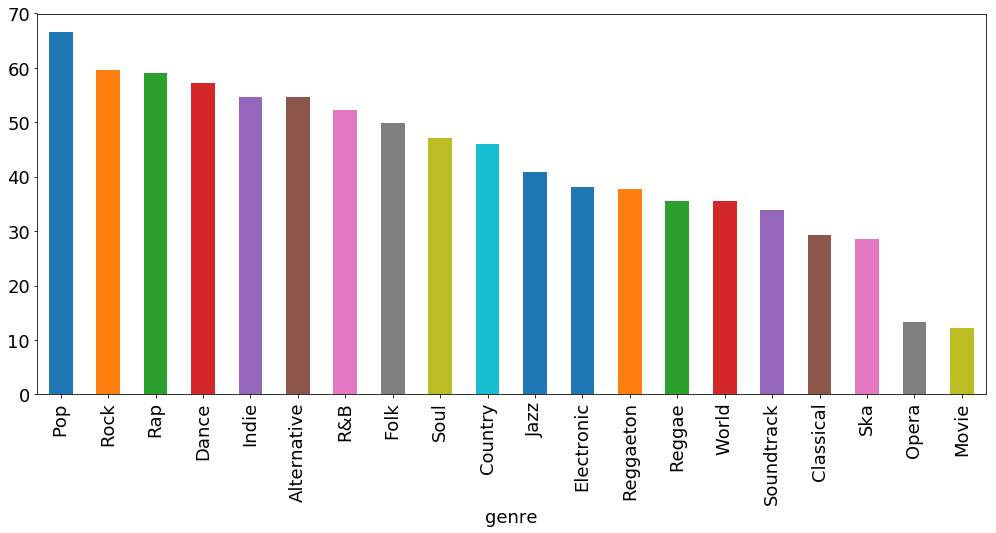

In [90]:
popularity_means = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
popularity_means['genre'] = popularity_means.index
popularity_means = popularity_means['popularity']
popularity_means.plot.bar()


This graph shows that there is a general decline in mean popularity across genres, suggesting that popularity could be used to help predict a song genre. However popularity is not an acoustic quality, so we cannot use popularity as a means to predict song genre.

#### Bar Chart of Average Danceability Across Genres

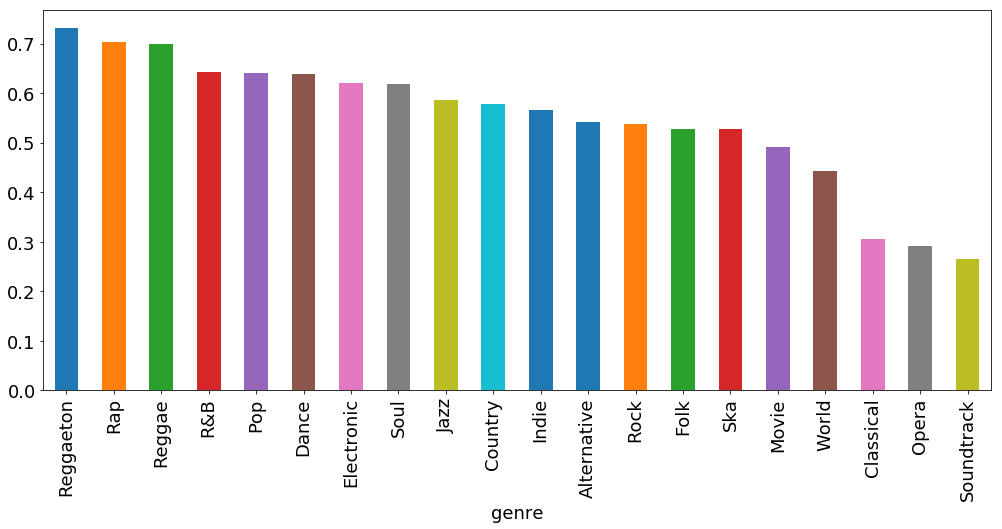

In [91]:
danceability_means = df.groupby(['genre']).mean().sort_values(by='danceability', ascending=False)
danceability_means['genre'] = danceability_means.index
danceability_means = danceability_means['danceability']
danceability_means.plot.bar()

This graph shows that there is a general decline in mean danceability across genres, suggesting that danceability could be used to help predict a song genre. Here we can see that Reggaeton has the highest danceability compared to Soundtrack which has the lowest danceability.

#### Bar Chart of Average Instrumentalness Across Genres

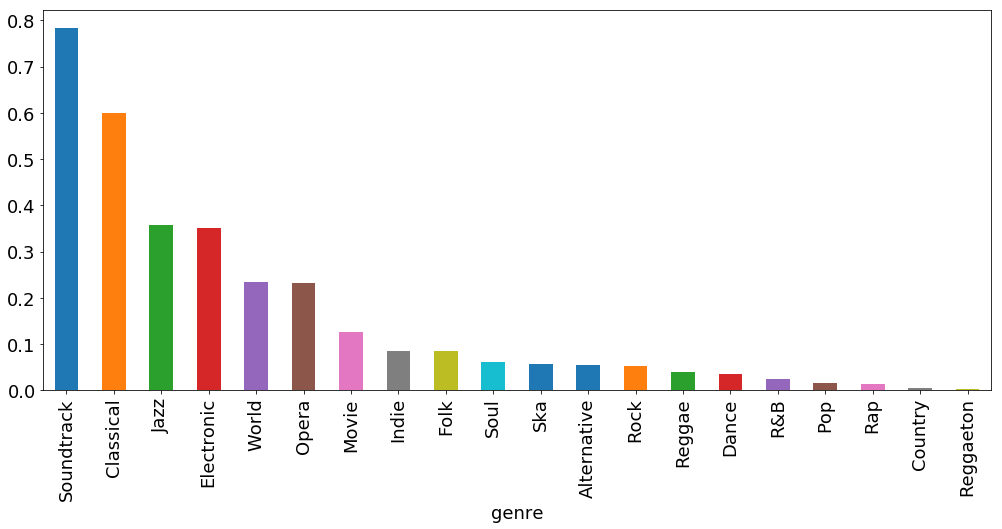

In [92]:
instrumentalness_means = df.groupby(['genre']).mean().sort_values(by='instrumentalness', ascending=False)
instrumentalness_means['genre'] = instrumentalness_means.index
instrumentalness_means = instrumentalness_means['instrumentalness']
instrumentalness_means.plot.bar()

From this graph we can see that there is a decline in average instrumentalness across the genres. This graph shows that the Soundtrack and Classical genres have significantly higher average instrumentalness than the majority of other genres. It may be possible to use instrumentalness to predict song genre.

#### Bar Chart of Average Liveness Across Genres

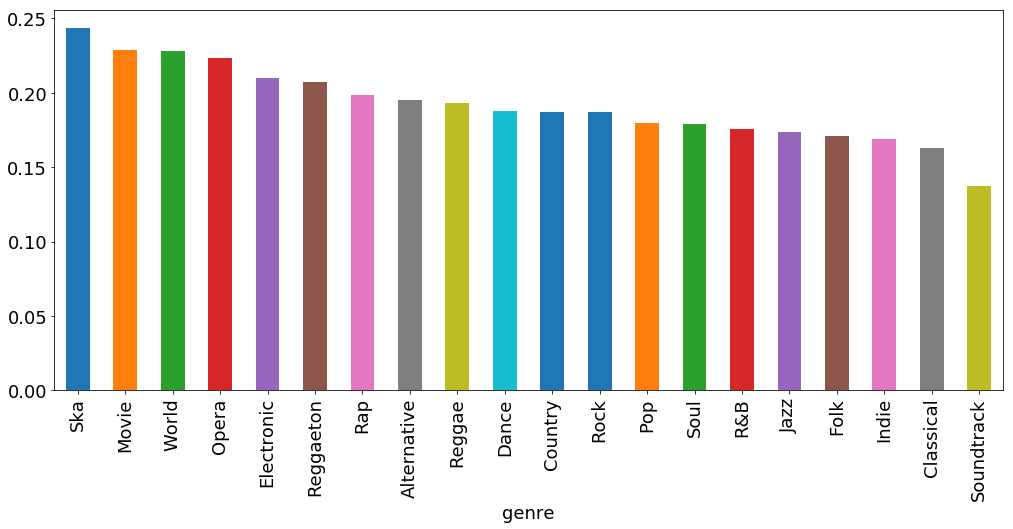

In [93]:
liveness_means = df.groupby(['genre']).mean().sort_values(by='liveness', ascending=False)
liveness_means['genre'] = liveness_means.index
liveness_means = liveness_means['liveness']
liveness_means.plot.bar()

This bar chart tells us that Comedy has the highest liveness out of the genres, while the remaining genres have about the same liveness. From this we can say that liveness has low potential in being able to predict song genre.

#### Bar Chart of Average Loudness Across Genres

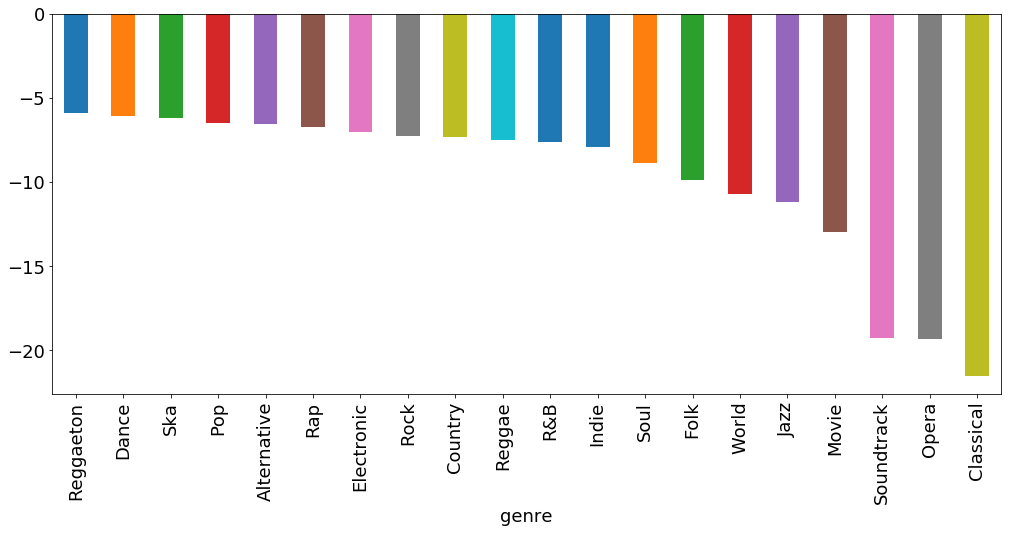

In [94]:
loudness_means = df.groupby(['genre']).mean().sort_values(by='loudness', ascending=False)
loudness_means['genre'] = loudness_means.index
loudness_means = loudness_means['loudness']
loudness_means.plot.bar()

This graph shows that there is a general decline in mean loudness across genres, suggesting that loudness could be used to help predict a song genre. Here we can see that Reggaeton has the highest loudness compared to Classical which has the lowest loudness.

#### Bar Chart of Average Tempo Across Genres

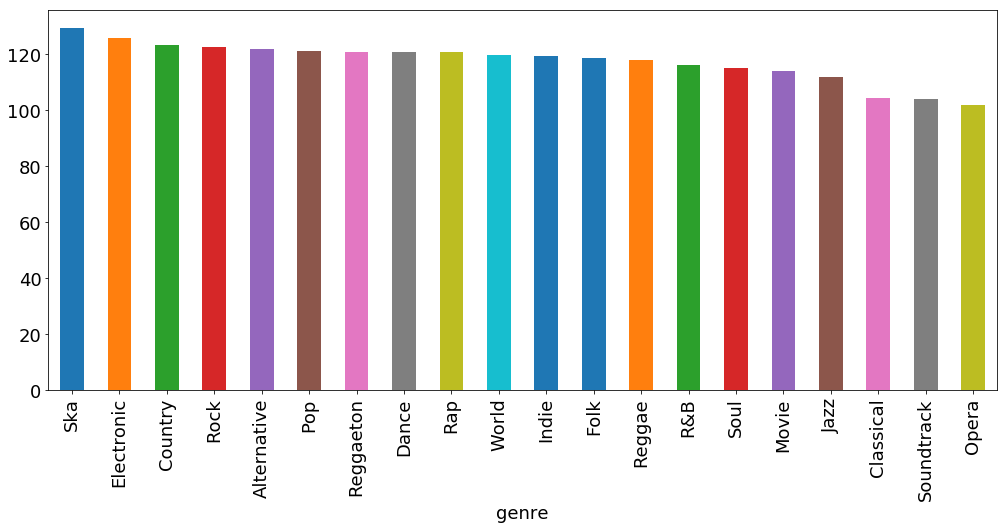

In [95]:
# Plot average tempo across genres
tempo_means = df.groupby(['genre']).mean().sort_values(by='tempo', ascending=False)
tempo_means['genre'] = tempo_means.index
tempo_means = tempo_means['tempo']
tempo_means.plot.bar()

This graph shows that there is a general decline in mean tempo across genre, however the averages are the same between the genres of Blues to Hip Hop, so tempo may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Acousticness Across Genres

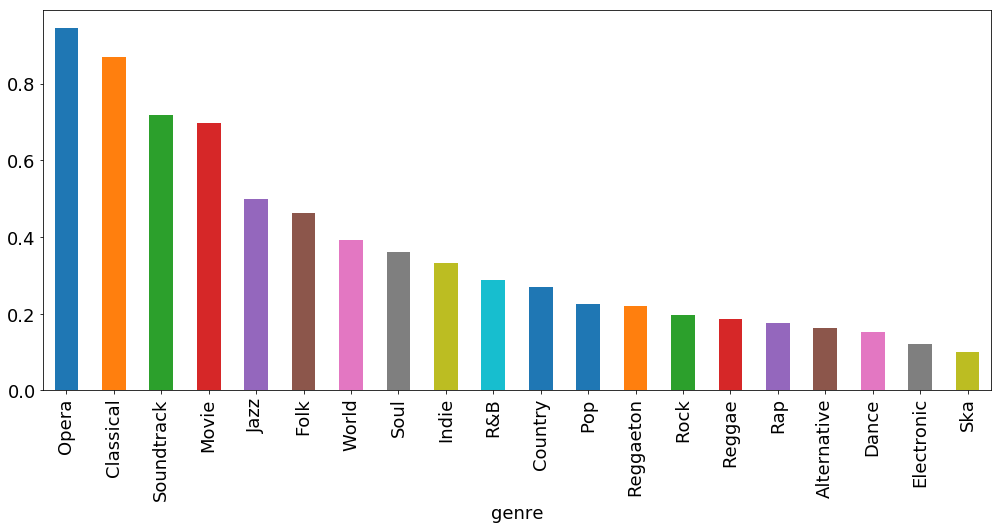

In [96]:
accoustic_means = df.groupby(['genre']).mean().sort_values(by='acousticness', ascending=False)
accoustic_means['genre'] = accoustic_means.index
acc_means=accoustic_means['acousticness']
acc_means.plot.bar()


From this graph we can see that there is a decline in average acousticness across the genres. Because of this it may be possible to use instrumentalness to predict song genre. Here we can see Opera has the highest acousticness, while Ska has the lowest acousticness.

#### Bar Chart of Average Valence Across Genres

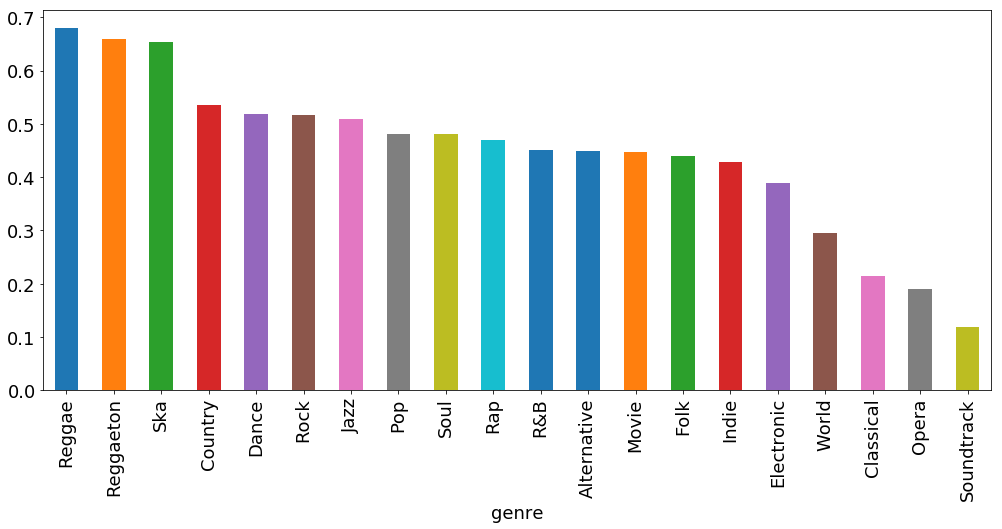

In [97]:
# Plot average valence across genres
valence_means = df.groupby(['genre']).mean().sort_values(by='valence', ascending=False)
valence_means['genre']=valence_means.index
val_means=valence_means['valence']
val_means.plot.bar()

This graph shows that there is a general decline in mean valence across genre, however the averages are the same between the genres of Rap to Movie, so valence may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Speechiness Across Genres

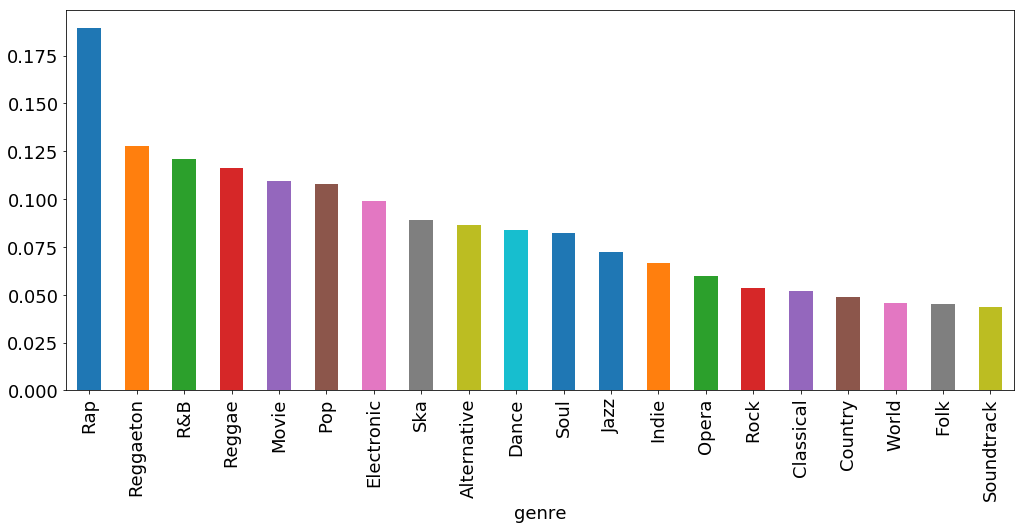

In [98]:
speechiness_means = df.groupby(['genre']).mean().sort_values(by='speechiness', ascending=False)
speechiness_means['genre']=speechiness_means.index
speech_means=speechiness_means['speechiness']
speech_means.plot.bar()

This bar chart tells us that Comedy has the highest speechiness out of the genres, while the remaining genres have about the same speechiness. From this we can say that speechiness has low potential in being able to predict song genre.

#### Bar Chart of Average Duration Across Genres

In [99]:
# i removed duration_ms in the data cleaning section because i dont think its a good measure to define genre
# if u guys want to use it just lmk and i'll add it back - james

#duration_means = df.groupby(['genre']).mean().sort_values(by='duration_ms', ascending=False)
#duration_means['genre']=duration_means.index
#dur_means=duration_means['duration_ms']
#dur_means.plot.bar()

This graph shows that there is a general decline in mean duration across genre, however the averages are the same between the genres of Soul to Reggaeton, so duration may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Energy Across Genres

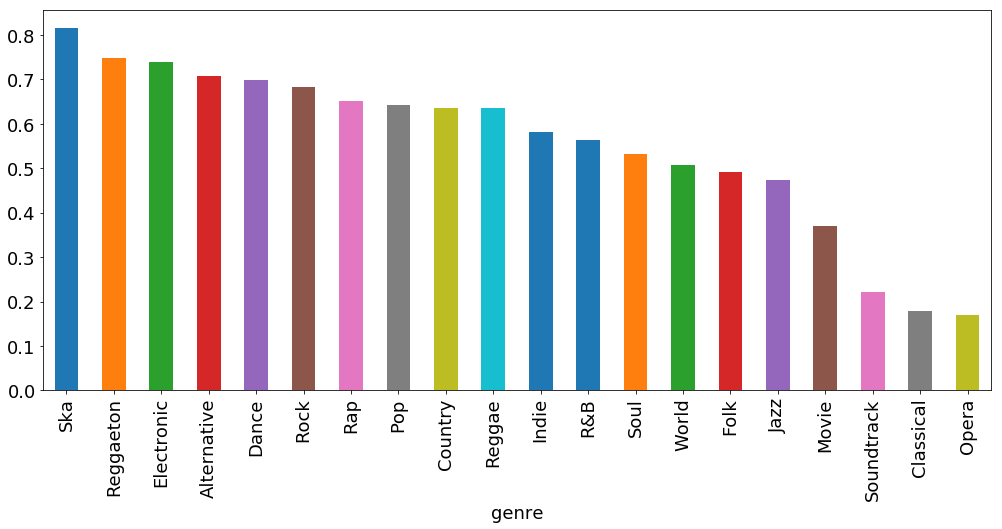

In [100]:
energy_means = df.groupby(['genre']).mean().sort_values(by='energy', ascending=False)
energy_means['genre']=energy_means.index
en_means=energy_means['energy']
en_means.plot.bar()

This graph shows that there is a general decline in mean energy across genre, however the averages are the same between the genres of Blues to Alternative and between Pop to Reggae, so duration may not be viable to use when trying to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

After plotting the mean values of all attributes across genres we can spot trends between genres. Plots where the average value for an attribute across genres could be used to determine a song's genre, but only if every mean is unique from one another.

From this we have determined that the following attributes have potential for predicting genre: danceability, loudness, acousticness, energy, and instrumentalness. Though we included tempo in our hypothesis, after this portion of exploratory data analysis we determined that tempo is not useful in predicting song genre.

To further test if the above attributes are viable to use to determine a song's genre, we must look closer at their values and distributions.

### Distribution Plots of All Attributes Across Genres

Below we plot the distributions for all attributes across the population. We do this so we can visualize their distributions and determine if they are normal or not.

#### Distribution Plot of All Attributes with Scale from 0.0 to 1.0 in the Population

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribution of Attributes for All Songs')

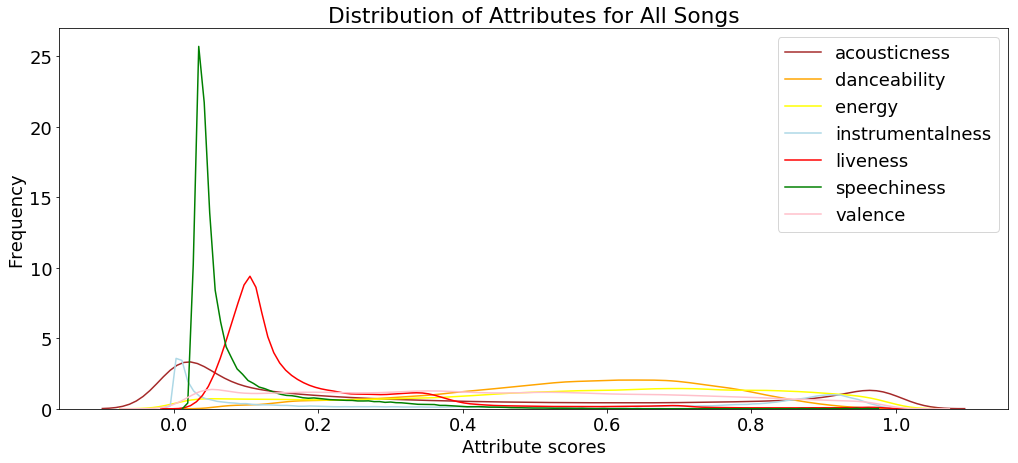

In [101]:
line1 = sns.distplot(df[['acousticness']], bins = 25, hist=False, rug=False, label = 'acousticness', color= 'brown' )
line2 = sns.distplot(df[['danceability']], bins = 25,  hist=False, rug=False, label = 'danceability',color = 'orange')
line3 = sns.distplot(df[['energy']], hist=False, bins = 25,  rug=False, label = 'energy', color = 'yellow')
line4 = sns.distplot(df[['instrumentalness']], bins = 25,  hist=False, rug=False,label = 'instrumentalness', color = 'lightblue')
line5 = sns.distplot(df[['liveness']], bins = 25,  hist=False, rug=False, label = 'liveness', color = 'red')
line6 = sns.distplot(df[['speechiness']], bins = 25,  hist=False, rug=False, label = 'speechiness', color = 'green')
line7 = sns.distplot(df[['valence']], hist=False, bins = 25,  rug=False, label = 'valence',  color = 'pink')

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Attributes for All Songs')

#### Distribution Plot of Loudness in the Population

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


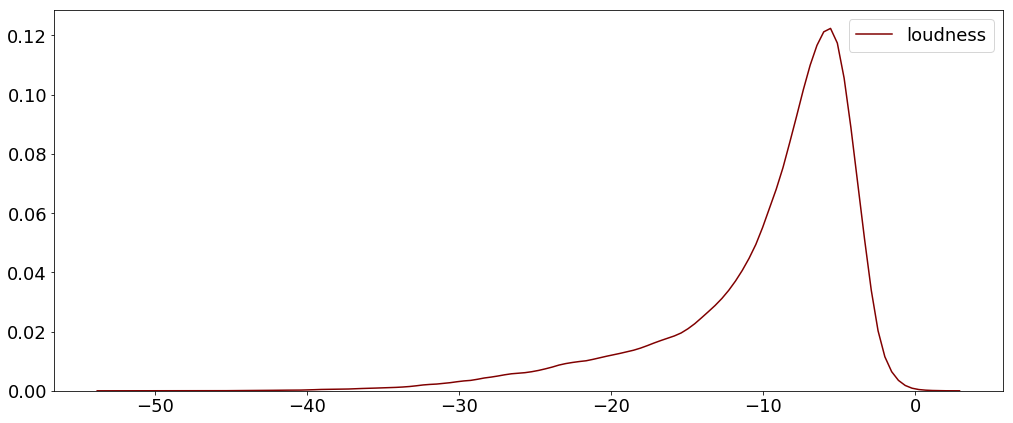

In [102]:
sns.distplot(df[['loudness']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Distribution Plot of Tempo in the Population

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


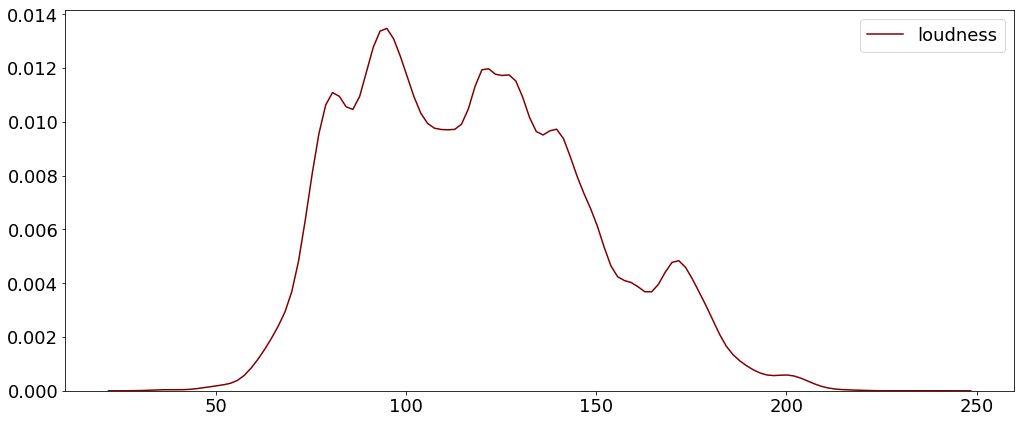

In [103]:
sns.distplot(df[['tempo']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Check If Distributions For Attributes Are Normal

In [104]:
#Checks if the distribution of the "popularity" attribute is normal
k2_pop, p = stats.normaltest(df['popularity'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the popularity attribute is normal
    print("The null hypothesis that 'The distribution of the popularity attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the popularity attribute is normal' cannot be rejected")

#Checks if the distribution of the "danceability" attribute is normal
k2, p = stats.normaltest(df['danceability'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the danceability attribute is normal
    print("The null hypothesis that 'The distribution of the danceability attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the danceability attribute is normal' cannot be rejected")

#Checks if the distribution of the "instrumentalness" attribute is normal
k2, p = stats.normaltest(df['instrumentalness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the instrumentalness attribute is normal
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['liveness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the liveness attribute is normal
    print("The null hypothesis that 'The distribution of the liveness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the liveness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['loudness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the loudness attribute is normal
    print("The null hypothesis that 'The distribution of the loudness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the loudness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "speechiness" attribute is normal
k2, p = stats.normaltest(df['speechiness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the speechiness attribute is normal
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "valence" attribute is normal
k2, p = stats.normaltest(df['valence'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the valence attribute is normal
    print("The null hypothesis that 'The distribution of the valence attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the valence attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the tempo attribute is normal
    print("The null hypothesis that 'The distribution of the tempo attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the tempo attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the acousticness attribute is normal
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal' cannot be rejected")

    

The null hypothesis that 'The distribution of the popularity attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the danceability attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the instrumentalness attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the liveness attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the loudness attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the speechiness attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the valence attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the tempo attribute is normal' cannot be rejected
The null hypothesis that 'The distribution of the acousticness attribute is normal' cannot be rejected


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1276: RuntimeWarning: invalid value encountered in absolute
  return SkewtestResult(Z, 2 * distributions.norm.sf(np.abs(Z)))
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1355: RuntimeWarning: invalid value encountered in absolute
  return KurtosistestResult(Z, 2 * distributions.norm.sf(np.abs(Z)))


From these assertions we know that none of the distributions for any of the attributes across the genres are normal. This is because we reject the null hypothesis that the distribution is normal. Now that we know this, we can plot the distribution plots of the five attributes that we think have the ability to predict song genre (acousticness, danceability, loudness, energy).

### Distribution Plots of All Attributes Across Genres


In the last section we determined which attributes have potential in predicting song genre by graphing the mean values of each attribute across all of the genres. We cannot assume that these attributes are correct in being able to predict song genre with only the mean, so we need to look at their distributions between genres.

#### Distribution Plot of Acousticness of All Songs in Each Genre

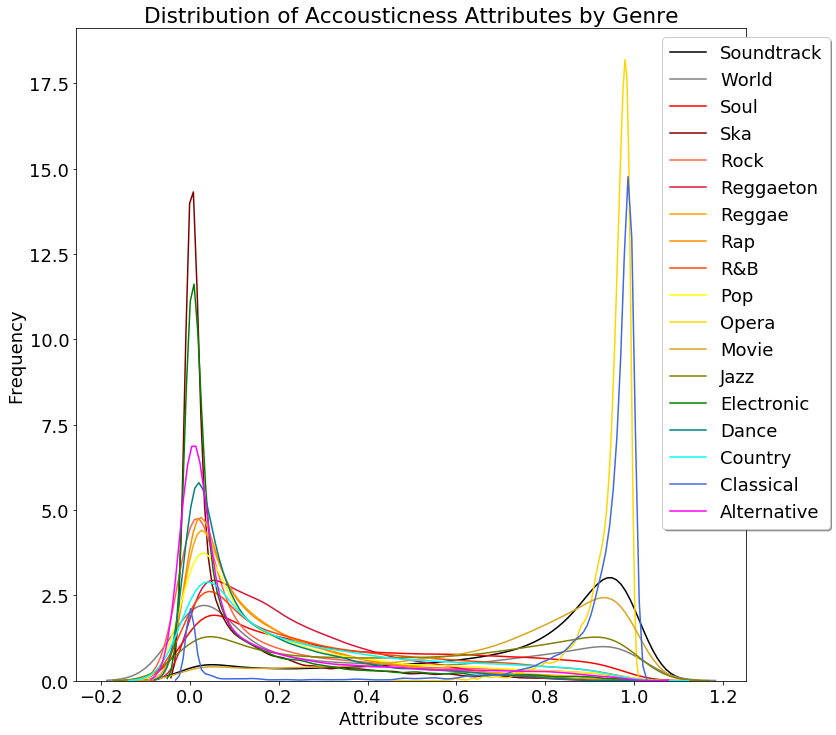

In [105]:
sns.distplot(df_Soundtrack[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['acousticness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['acousticness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['acousticness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
#sns.distplot(df_Indie[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
#sns.distplot(df_HipHop[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
#sns.distplot(df_Comdedy[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
#sns.distplot(df_ChildrensMusic[['acousticness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
#sns.distplot(df_Blues[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
#sns.distplot(df_Anime[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
#sns.distplot(df_Acapella[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Accousticness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


From this plot we can see that the distributions of acousticness are not similar. The attributes have different frequencies across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

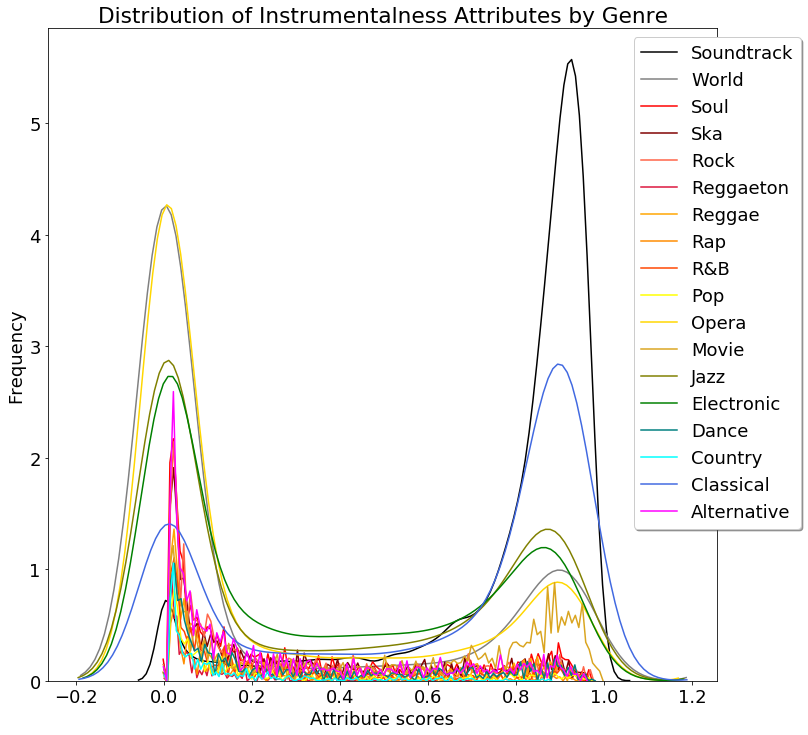

In [106]:
#plots the distribution of the instrumentalness attributes of all songs in each Genre

sns.distplot(df_Soundtrack[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
#sns.distplot(df_Indie[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
#sns.distplot(df_HipHop[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
#sns.distplot(df_Comdedy[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
#sns.distplot(df_ChildrensMusic[['instrumentalness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
#sns.distplot(df_Blues[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
#sns.distplot(df_Anime[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
#sns.distplot(df_Acapella[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of instrumentalness are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

#### Distribution Plot of Danceability of All Songs in Each Genre

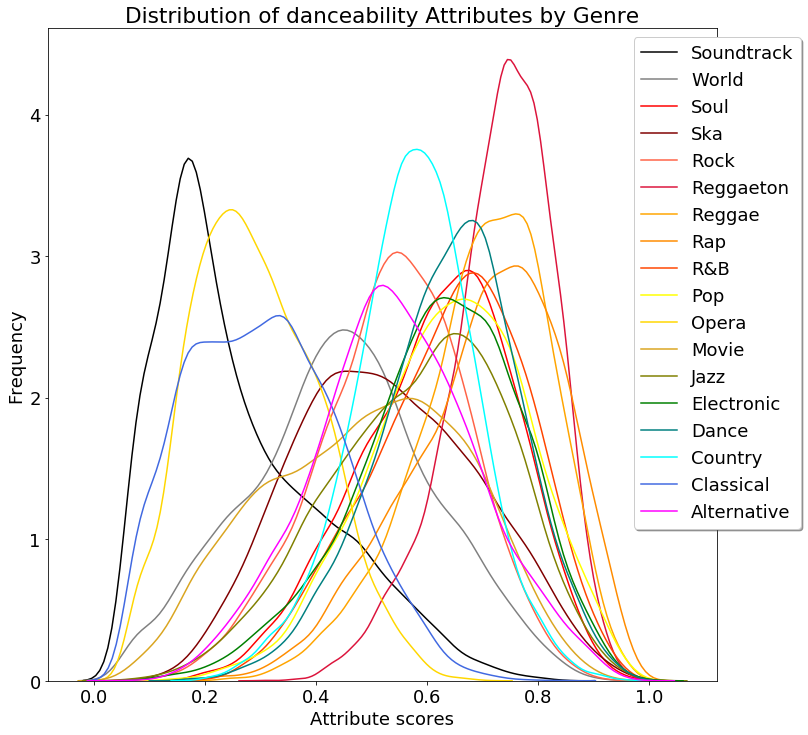

In [107]:
sns.distplot(df_Soundtrack[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['danceability']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['danceability']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['danceability']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['danceability']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['danceability']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['danceability']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['danceability']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
#sns.distplot(df_Indie[['danceability']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
#sns.distplot(df_HipHop[['danceability']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['danceability']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['danceability']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['danceability']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
#sns.distplot(df_Comdedy[['danceability']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['danceability']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
#sns.distplot(df_ChildrensMusic[['danceability']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
#sns.distplot(df_Blues[['danceability']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
#sns.distplot(df_Anime[['danceability']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['danceability']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
#sns.distplot(df_Acapella[['danceability']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of danceability Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of danceability are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that danceability can be used to predict song genre.

#### Distribution Plot of Energy of All Songs in Each Genre

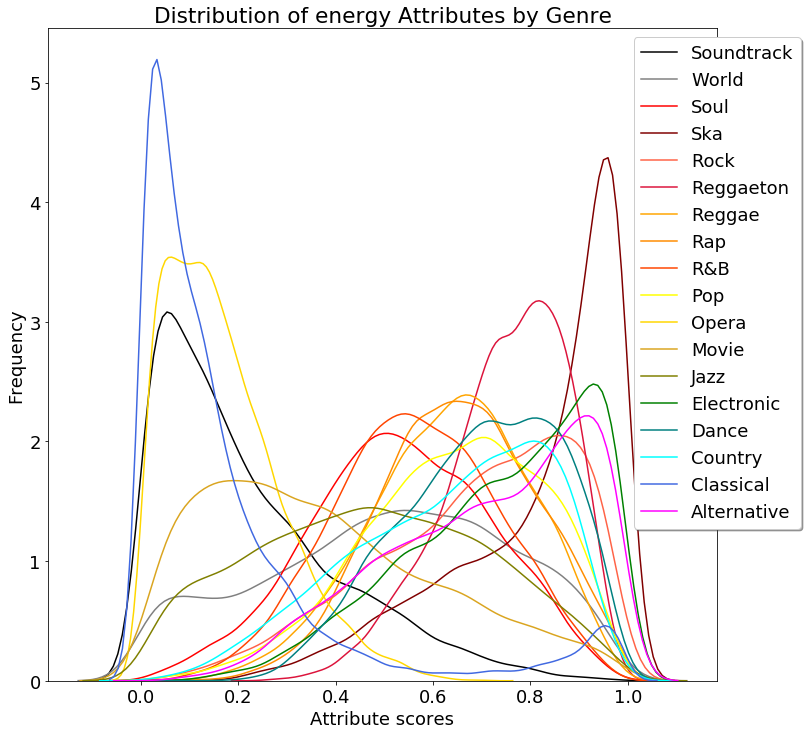

In [108]:
sns.distplot(df_Soundtrack[['energy']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['energy']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['energy']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['energy']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['energy']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['energy']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['energy']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['energy']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['energy']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['energy']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['energy']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
#sns.distplot(df_Indie[['energy']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
#sns.distplot(df_HipHop[['energy']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['energy']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['energy']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['energy']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
#sns.distplot(df_Comdedy[['energy']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['energy']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
#sns.distplot(df_ChildrensMusic[['energy']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
#sns.distplot(df_Blues[['energy']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
#sns.distplot(df_Anime[['energy']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['energy']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
#sns.distplot(df_Acapella[['energy']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of energy Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of energy are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that energy can be used to predict song genre.

#### Distribution Plot of Loudness of All Songs in Each Genre

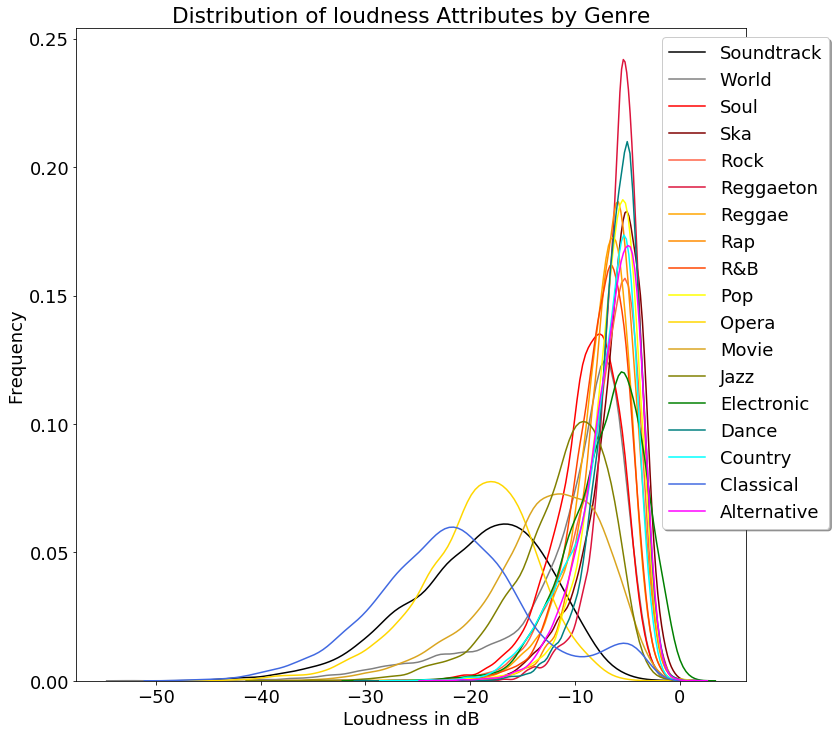

In [109]:
sns.distplot(df_Soundtrack[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['loudness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['loudness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['loudness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['loudness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['loudness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['loudness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['loudness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
#sns.distplot(df_Indie[['loudness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
#sns.distplot(df_HipHop[['loudness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['loudness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['loudness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['loudness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
#sns.distplot(df_Comdedy[['loudness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['loudness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
#sns.distplot(df_ChildrensMusic[['loudness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
#sns.distplot(df_Blues[['loudness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
#sns.distplot(df_Anime[['loudness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['loudness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
#sns.distplot(df_Acapella[['loudness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Loudness in dB')
plt.ylabel('Frequency')
plt.title('Distribution of loudness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of loudness are similar. The attributes' frequencies take the same shape and overlap around -5dB. Because of this there is not enough significant difference between the distributions of each genre.

We determine that loudness cannot be used to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

From plotting the distributions of our predicted attributes across genres we have determined that danceability, instrumentalness, acousticness, and energy can be used to determine song genre. This is because their distributions differed between genres, indicating that there is enough variance between genres to create boundaries.

The loudness attribute's distribution was too similar across genres so we assert that loudness cannot be used to determine song genre.

## Analysis

After exploring our data we have narrowed down the audio attributes to four attributes that we believe are capable of predicting a song's genre. These four attributes have different enough distributions such that the trends across each genre are distinct. From here we can attempt building a model that can predict a song's genre using these four attributes: danceability, instrumentalness, acousticness, energy.

### Linear Regression / Correlation

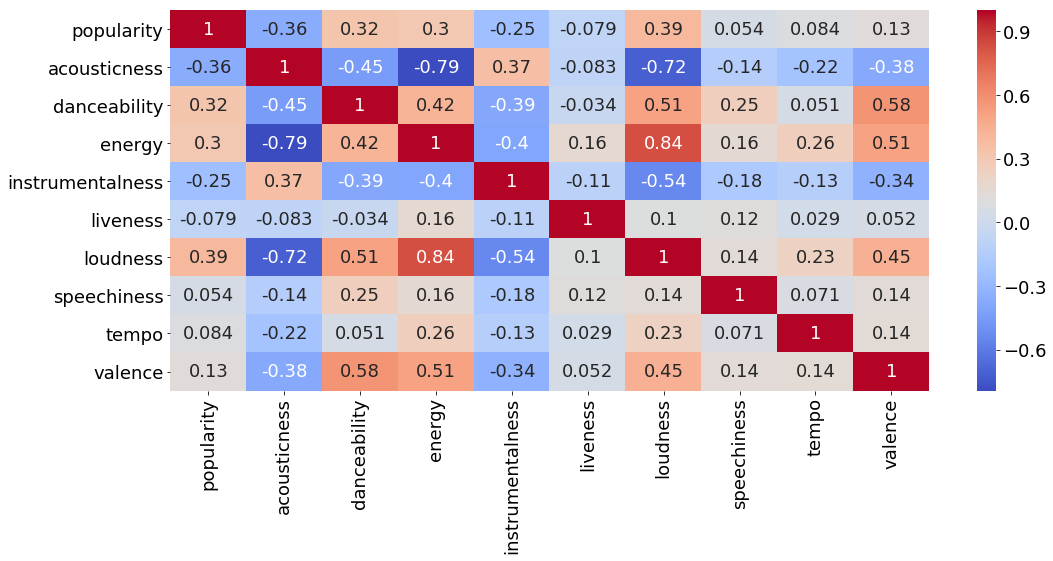

In [110]:
# findng out what attributes are correlated with each other
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [111]:
# multiple linear regression - need to change since we aren't looking at popularity
outcome, predictors = patsy.dmatrices('popularity ~ danceability + energy + tempo', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     9858.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        02:44:01   Log-Likelihood:            -7.7296e+05
No. Observations:              184190   AIC:                         1.546e+06
Df Residuals:                  184186   BIC:                         1.546e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.8589      0.179    127.387   

If danceability, energy, and tempo were all 0, the Popularity would be 20.58 (intercept).

Holding energy and tempo constant, for every 1 unit increase in Danceability, you expect to see a 21.67 unit increase in Popularity.

Holding danceability and tempo constant, for every 1 unit increase in Energy, you expect to see a 12.20 unit increase in Popularity.

Holding danceability and energy constant, for every 1 unit increase in Tempo, you expect to see a 0.038 unit increase in Popularity.

In [112]:
# testing imports for clustering (check tutorial notebook #15)
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [113]:
X = df['danceability'].as_matrix().reshape(-1,1)
y = df['energy'].as_matrix().reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=12)

#model = LogisticRegression()
#model.fit(X_train, y_train)

#predictions = model.predict(X_test)

#print(model.score(X_test, y_test))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


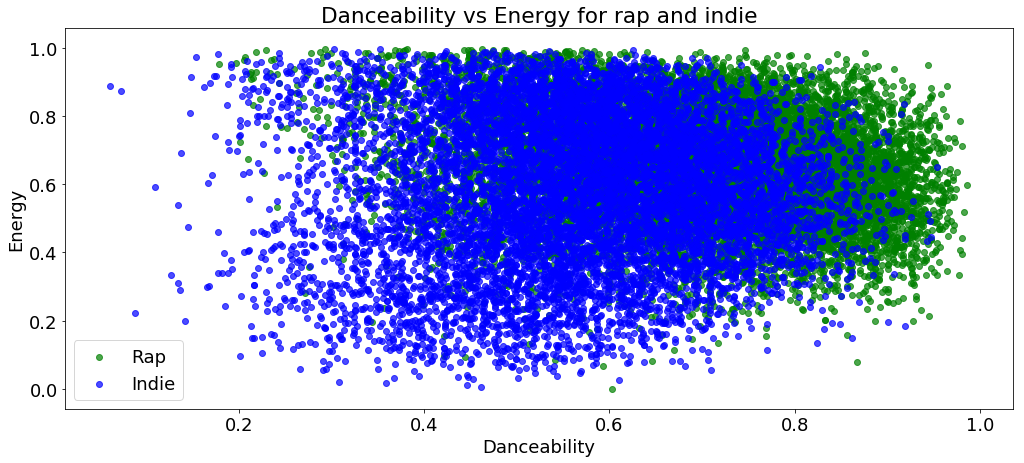

In [114]:
# looking at distinctions of attributes between hip-hop and rap genres
plt.scatter(df.danceability[df.genre=='Rap'], df.energy[df.genre=='Rap'],
           c='green', alpha=0.7, label='Rap')
plt.scatter(df.danceability[df.genre=='Indie'], df.energy[df.genre=='Indie'],
           c='blue', alpha=0.7, label='Indie')

plt.title('Danceability vs Energy for rap and indie')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()

In [115]:
d1 = df.danceability[df.genre==('Rap' or 'Indie')]
d2 = df.energy[df.genre==('Rap' or 'Indie')]

In [116]:
d1w = whiten(d1)
d2w = whiten(d2)

In [117]:
data = np.vstack([d1w, d2w]).T

In [118]:
km = KMeans(n_clusters=2, random_state=25)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

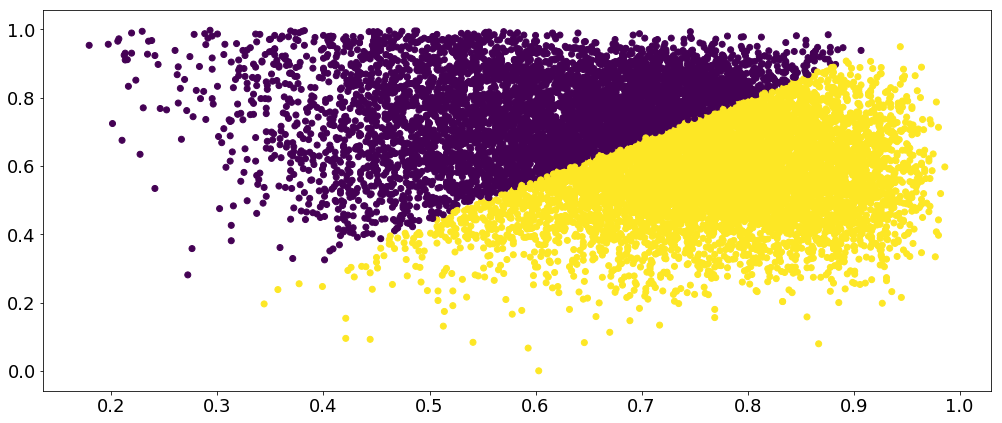

In [119]:
plt.scatter(d1, d2, c=km.labels_);


### Dimensionality Reduction

In [120]:
#This will reduce the number of random variables to consider and make the differences and similarities easier to see. 
#dim_reduc = average_popularity.drop(['popularity', 'duration_ms', 'liveness', 'loudness', 'speechiness', 'valence'], axis=1)
#dim_reduc

In [121]:
#Example on how the different genres differ. 

#Reduces the number of genres to make it easier to compare the differences. 
#dim_reduc_compare = dim_reduc.drop(['Rap','Rock','Dance','Indie','Anime','Alternative','Folk','Soul','Country','Electronic','Reggaeton','Reggae','World','Soundtrack','Classical','Ska','Comedy','Opera','Movie','A Capella','Blues'])
#dim_reduc_compare

In [122]:
#Shows how genres differe in acousticness 
#dim_reduc_graph1 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='acousticness', ascending=False)
#dim_reduc_graph1['genre'] = dim_reduc_graph1.index
#dim_reduc1_means=dim_reduc_graph1['acousticness']
#dim_reduc1_means.plot.bar()

In [123]:
#Shows how genres differe in energy 
#dim_reduc_graph2 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='energy', ascending=False)
#dim_reduc_graph2['genre'] = dim_reduc_graph2.index
#dim_reduc2_means=dim_reduc_graph2['energy']
#dim_reduc2_means.plot.bar()

In [124]:
#Shows how genres differe in instrumentalness 
#dim_reduc_graph3 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='instrumentalness', ascending=False)
#dim_reduc_graph3['genre'] = dim_reduc_graph3.index
#dim_reduc3_means=dim_reduc_graph3['instrumentalness']
#dim_reduc3_means.plot.bar()

We noticed that certain generas are easiy indistinguishable based on acusticness, energy and instrumentalness. Tempo and dancability can also help determine what kind of genre the song is.


### SVM (testing - not sure if works or not)

In [125]:
#Testing to apply SVM in this cell just experimenting

#create a new df
e_df = df

#create a df with only genre of a song, the index, instrumentalness, accousticness, danceability, energy 
e_df = e_df.drop(columns=['artist_name', 'track_name', 'track_id', 'popularity', 'liveness', 'loudness', 'speechiness'])
#removes all songs with genre acapella
# updated because acapella genre removed in data cleaning section
#e_df = e_df[e_df.genre != 'A Capella']


def convert_label(label):
    if label == 'Alternative':
        output = 1.0
    elif label == 'Anime':
        output = 2.0
    elif label == 'Blues':
        output = 3.0
    elif label == 'Children’s Music':
        output = 4.0
    elif label == 'Classical':
        output = 5.0
    elif label == 'Comedy':
        output = 6.0
    elif label == 'Country':
        output = 7.0
    elif label == 'Dance':
        output = 8.0
    elif label == 'Electronic':
        output = 9.0
    elif label == 'Folk':
        output = 10.0
    elif label == 'Hip-Hop':
        output = 11.0
    elif label == 'Indie':
        output = 12.0
    elif label == 'Jazz':
        output = 13.0
    elif label == 'Movie':
        output = 14.0
    elif label == 'Opera':
        output = 15.0
    elif label == 'Pop':
        output = 16.0
    elif label == 'R&B':
        output = 17.0
    elif label == 'Rap':
        output = 18.0
    elif label == 'Reggae':
        output = 19.0
    elif label == 'Reggaeton':
        output = 20.0
    elif label == 'Rock':
        output = 21.0
    elif label == 'Ska':
        output = 22.0
    elif label == 'Soul':
        output = 23.0
    elif label == 'Soundtrack':
        output = 24.0
    elif label == 'World':
        output = 25.0
    else:
        output = label
        
    return output

e_df['genre_id'] = e_df['genre'].apply(convert_label)

e_df_X = e_df.drop(columns = 'genre')

e_df_X = e_df_X.as_matrix()

e_df_Y = e_df['genre_id']

num_training = int(len(e_df)*.6)
num_testing = int(len(e_df)*.4)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

edf_train_X, edf_test_X, edf_train_y, edf_test_y = train_test_split(e_df_X, e_df_Y, train_size = num_training, test_size = num_testing )

def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel = 'linear')
    clf.fit(X,y)
    
    return clf

edf_clf = train_SVM(edf_train_X, edf_train_y)

edf_predicted_train_y = edf_clf.predict(edf_train_X)

edf_predicted_test_y = edf_clf.predict(edf_test_X)

print(classification_report(edf_train_y,edf_predicted_train_y))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Ethics & Privacy

The Spotify dataset we are using originated from user Zaheen Hamidani on 'kaggle.com', an online community for data scientists to host datasets. The information in this dataset was gathered through the official Spotify API and was then cleaned, organized, and uploaded to ‘kaggle.com’. Because the dataset was created using the Spotify API as a source and does not include any surveyed information from people, we can claim that the data is secure. The Spotify API itself is open source, which gives us permission to use this data for this purpose. As a result, this dataset is appropriate to use for our project.


In terms of potential bias, the dataset could be subject to collection bias. The dataset contains information for over 228,159 songs however the number of songs represented per genre is not even. We saw this in the Data Cleaning section where the Comedy genre had 9681 songs, while the A Capella genre had only 119 songs. Though we removed the A Capella genre due to its underrepresentation, the slight difference in representations across genres could still affect how we interpret our analysis. Despite the outlier genre of A Capella, the remaining genres are within ~1500 entries of one another which gives validity when making our interpretations.
An unintended consequence of our analysis could result in the over generalization of a music genre’s attribute boundaries. We attempted to define the boundaries for ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ for each genre, however our findings may not be conclusive enough to claim that we can accurately categorize songs based on these qualities.


# Conclusion & Discussion

*Fill in your discussion information here*